In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

population z-score

z = (x-mu)/sigma

sample z-score

z = (x-x_bar)/s

In [6]:
def calculate_z_score(data):
    mean = np.mean(data)
    std = np.std(data, ddof=1) #1 for sample std, 0 for population standard deviation
    z_score = (data - mean)/std
    return z_score


generating samples from two different distributions

In [7]:
apple_sizes = np.random.normal(8, 1.2, 50)
oranze_sizes = np.random.normal(6.5, 0.8, 50)

In [8]:
df = pd.DataFrame({'apple_sizes':apple_sizes, 'orange_sizes':oranze_sizes})

In [10]:
df.head(5)

,apple_sizes,orange_sizes
0,9.241218,6.913976
1,8.778884,5.646122
2,5.950544,6.257299
3,6.521303,6.482070
4,8.864308,6.070222


In [11]:
df['apple_z_scores'] = calculate_z_score(df.apple_sizes)
df['orange_z_scores'] = calculate_z_score(df.orange_sizes)

In [13]:
df.head(5)

,apple_sizes,orange_sizes,apple_z_scores,orange_z_scores
0,9.241218,6.913976,0.859079,0.330108
1,8.778884,5.646122,0.479881,-1.115147
2,5.950544,6.257299,-1.839874,-0.418452
3,6.521303,6.482070,-1.371748,-0.162230
4,8.864308,6.070222,0.549944,-0.631706


In [17]:
# Find extreme values (|z| > 2)
apple_extremes = df[abs(df['apple_z_scores']) > 2]
orange_extremes = df[abs(df['orange_z_scores']) > 2]

print(f"\nExtreme Apple Sizes (|z| > 2): {len(apple_extremes)} fruits")
print(f"Extreme Orange Sizes (|z| > 2): {len(orange_extremes)} fruits")


Extreme Apple Sizes (|z| > 2): 1 fruits
Extreme Orange Sizes (|z| > 2): 1 fruits


In [20]:
# Randomly select one apple and one orange
random_idx = np.random.randint(0, len(df))
selected_apple_z = df['apple_z_scores'].iloc[random_idx]
selected_orange_z = df['orange_z_scores'].iloc[random_idx]


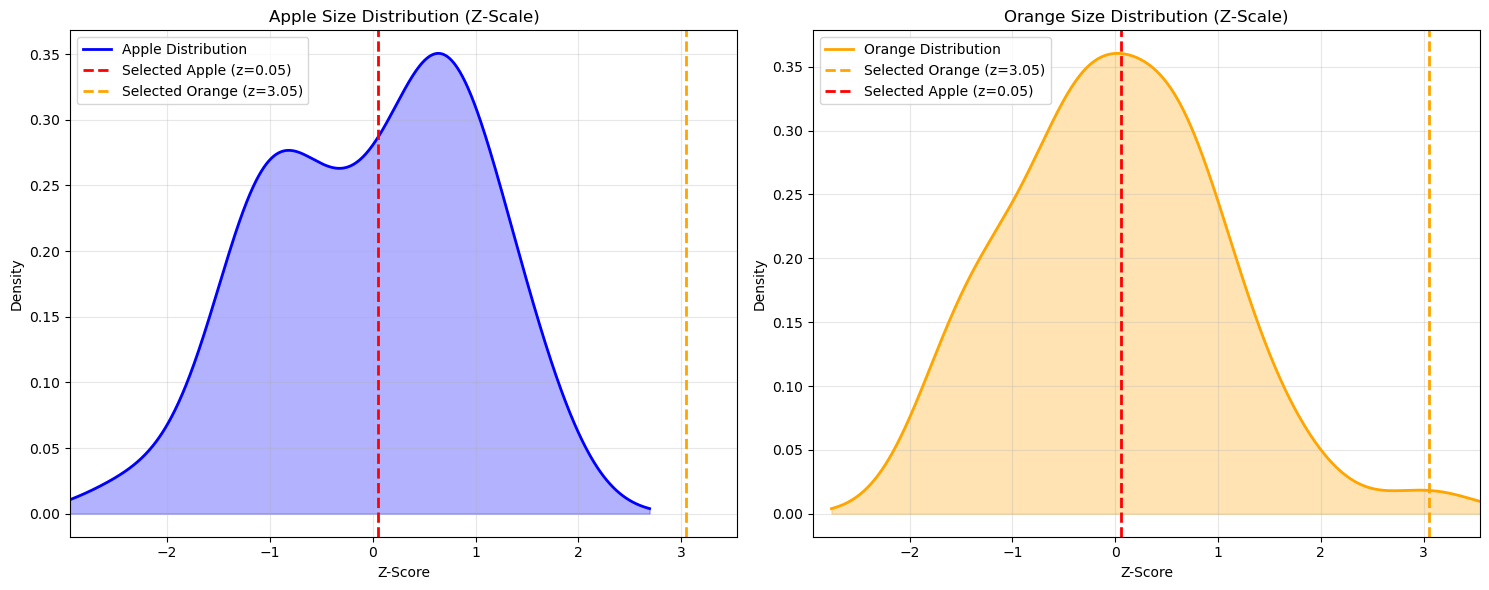

In [33]:
# Create the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Apple distribution on z-scale
apple_kde = stats.gaussian_kde(df['apple_z_scores'])
x_apple = np.linspace(df['apple_z_scores'].min() - 1, df['apple_z_scores'].max() + 1, 1000)
y_apple = apple_kde(x_apple)

ax1.plot(x_apple, y_apple, 'b-', linewidth=2, label='Apple Distribution')
ax1.fill_between(x_apple, y_apple, alpha=0.3, color='blue')
ax1.axvline(x=selected_apple_z, color='red', linestyle='--', linewidth=2, 
           label=f'Selected Apple (z={selected_apple_z:.2f})')
ax1.axvline(x=selected_orange_z, color='orange', linestyle='--', linewidth=2, 
           label=f'Selected Orange (z={selected_orange_z:.2f})')
ax1.set_xlabel('Z-Score')
ax1.set_ylabel('Density')
ax1.set_title('Apple Size Distribution (Z-Scale)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Orange distribution on z-scale
orange_kde = stats.gaussian_kde(df['orange_z_scores'])
x_orange = np.linspace(df['orange_z_scores'].min() - 1, df['orange_z_scores'].max() + 1, 1000)
y_orange = orange_kde(x_orange)

ax2.plot(x_orange, y_orange, 'orange', linewidth=2, label='Orange Distribution')
ax2.fill_between(x_orange, y_orange, alpha=0.3, color='orange')
ax2.axvline(x=selected_orange_z, color='orange', linestyle='--', linewidth=2, 
           label=f'Selected Orange (z={selected_orange_z:.2f})')
ax2.axvline(x=selected_apple_z, color='red', linestyle='--', linewidth=2, 
           label=f'Selected Apple (z={selected_apple_z:.2f})')
ax2.set_xlabel('Z-Score')
ax2.set_ylabel('Density')
ax2.set_title('Orange Size Distribution (Z-Scale)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Set consistent x-axis limits for better comparison
x_min = min(df['apple_z_scores'].min(), df['orange_z_scores'].min()) - 0.5
x_max = max(df['apple_z_scores'].max(), df['orange_z_scores'].max()) + 0.5
ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

plt.tight_layout()
